# Berlin Trees Visualizations

## Notebook Setup
1. Importing relevant libraries
2. Importing the Dataset
3. inspect data
4. Checking Data types

In [2]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [3]:
#pip install plotly==5.8.2


In [4]:
#import plotly.express as px

In [5]:
df = pd.read_csv('berlin_trees_data.csv')

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf


In [7]:
df.dtypes

Unnamed: 0                  int64
ID                         object
Baum Nr.                   object
Objektnr.                  object
Objektname                 object
Baumart deutsch            object
Baumart botanisch          object
Gattung botanisch          object
Straße                     object
Hausnr.                    object
Hausnr. Zusatz             object
Pflanzjahr                  int64
Standalter                  int64
Krone Durchmesser in m    float64
Stamm Umfang in cm        float64
Baumhöhe in m             float64
Bezirk                     object
dtype: object

In [8]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Baum Nr.', 'Objektnr.', 'Objektname',
       'Baumart deutsch', 'Baumart botanisch', 'Gattung botanisch', 'Straße',
       'Hausnr.', 'Hausnr. Zusatz', 'Pflanzjahr', 'Standalter',
       'Krone Durchmesser in m', 'Stamm Umfang in cm', 'Baumhöhe in m',
       'Bezirk'],
      dtype='object')


# Top 10 Trees per District Visualization
1. Check for Districts
2. Group by District
3. Make groups
4. Filter for top 10 trees

In [9]:
print(df['Bezirk'].unique())

['Charlottenburg-Wilmersdorf' 'Friedrichshain-Kreuzberg' 'Lichtenberg'
 'Marzahn-Hellersdorf' 'Neukölln' 'Pankow' 'Reinickendorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Treptow-Köpenick']


In [10]:
### Splitting Groups per district

df_district = df.groupby(['Bezirk'])

In [17]:
### Defining groups
df_marzahn = df_district.get_group('Marzahn-Hellersdorf')

In [18]:
### Filter out top 10 District trees

df_trees_in_charlottenburg = df_charlottenburg['Baumart deutsch'].value_counts()

In [19]:
type(df_trees_in_charlottenburg)


pandas.core.series.Series

<AxesSubplot:title={'center':'Top Ten Trees in Marzahn-Hellersdorf'}>

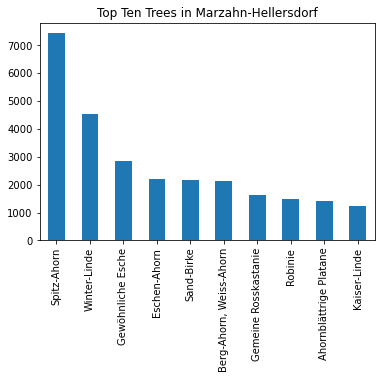

In [20]:
df_trees_in_charlottenburg.head(10).plot.bar(title="Top Ten Trees in Marzahn-Hellersdorf")

# Top 10 Strees with most trees per District Visualization


In [21]:
df_streets_in_marzahn = df_marzahn['Straße'].value_counts()

<AxesSubplot:title={'center':'Streets with most Trees in Marzahn-Hellersdorf'}>

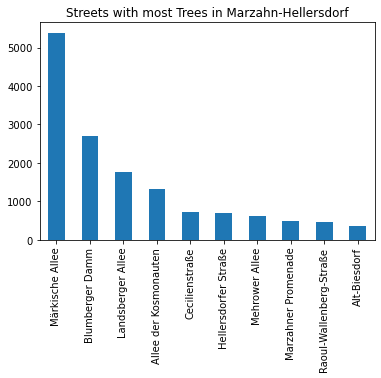

In [22]:
df_streets_in_marzahn.head(10).plot.bar(title="Streets with most Trees in Marzahn-Hellersdorf")

## Top Trees
1. oldest
2. highest

In [23]:
df_marzahn['Baumhöhe in m'].idxmax

<bound method Series.idxmax of 90284     11.0
90285      3.0
90286     12.0
90287      4.0
90288     16.0
          ... 
136610     7.0
136611     7.0
136612     7.0
136613     7.0
136614     7.0
Name: Baumhöhe in m, Length: 46331, dtype: float64>

In [24]:
### Heighest Tree
max_height_in_marzahn = df_marzahn['Baumhöhe in m'].idxmax()
heighest_tree_in_marzahn = df_marzahn.loc[[max_height_in_marzahn]]
print(heighest_tree_in_marzahn)

        Unnamed: 0                 ID Baum Nr. Objektnr.           Objektname  \
123976      123976  00008100:001bcac9       32     44067  Altentreptower Str.   

       Baumart deutsch     Baumart botanisch Gattung botanisch  \
123976         Robinie  Robinia pseudoacacia           ROBINIA   

                       Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  \
123976  Altentreptower Straße       0              0        1993          29   

        Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m  \
123976                     6.0                48.0           40.0   

                     Bezirk  
123976  Marzahn-Hellersdorf  


In [25]:
### Oldest Tree
max_age_in_marzahn = df_marzahn['Standalter'].idxmax()
oldest_tree_in_marzahn = df_marzahn.loc[[max_age_in_marzahn]]
print(oldest_tree_in_marzahn)

       Unnamed: 0                 ID Baum Nr. Objektnr.        Objektname  \
94719       94719  00008100:001ac1bc   333/13     41388  Hultschiner Damm   

                 Baumart deutsch           Baumart botanisch  \
94719  Winter-Linde 'Greenspire'  Tilia cordata 'Greenspire'   

      Gattung botanisch            Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  \
94719             TILIA  Hultschiner Damm       0              0        1193   

       Standalter  Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m  \
94719         829                     5.0                73.0            9.0   

                    Bezirk  
94719  Marzahn-Hellersdorf  
